In [25]:
#线性回归
#%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [26]:
#构造人造数据集   y = Xw + b + c(噪声)
def synthetic_data(w,b,num_examples):
    X = torch.normal(0,1,(num_examples,len(w))) # 均值为0，方差为1的随机数，大小是样本的个数，len(w)是列数，有两列
    y = torch.matmul(X,w) + b   # X是二维向量，w是一维向量，相乘后返回的是向量，所以后面要reshap
    y += torch.normal(0,0.01,y.shape)   #均值为0，方差为0.01，形状和y一致
    return X,y.reshape((-1,1))   #把x，y做成一列向量返回

true_w = torch.tensor([2,-3.4])   #真实的w，b
true_b = 4.2
features,labels = synthetic_data(true_w,true_b,1000)   #生成特征和标签


In [27]:
print('features:',features[0],'\nlabel:',labels[0])

features: tensor([-1.2420, -0.7249]) 
label: tensor([4.1777])


In [28]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"  #设置选项允许重复加载动态链接库。

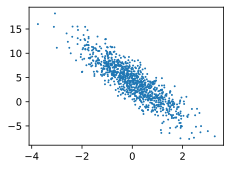

In [29]:
d2l.set_figsize()  # 设置配置大小
#plt.scatter用于生成scatter散点图
#.numpy是将tensor转换为numpy，，，，.detach（）是用来分离tensor但是不改变tensor，先detach才能numpy
#d2l.plt.scatter(features[:,(1)].detach().numpy(), labels.detach().numpy(),1);  

d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);          
# d2l.plt.show()

In [30]:
def data_iter(batch_size, features, labels):  #批量大小、特征、标签
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)   #随机打乱
    for i in range(0, num_examples, batch_size):     #batch_size步长
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]  
        #features和labels是上面已经生成好的
        #yield第一次调用不执行，调用next（）执行到yield，再次Next（），从yield执行

In [31]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.3666, -0.4608],
        [ 0.9115, -1.4669],
        [ 0.6243, -0.6056],
        [-0.1796, -1.0152],
        [-1.0285,  0.8778],
        [-1.7004,  0.0733],
        [-1.2787,  0.1526],
        [ 0.4350, -0.0563],
        [-0.8289, -0.6100],
        [ 0.5770, -1.0950]]) 
 tensor([[ 5.0374],
        [11.0098],
        [ 7.5244],
        [ 7.2907],
        [-0.8553],
        [ 0.5678],
        [ 1.1132],
        [ 5.2793],
        [ 4.6213],
        [ 9.0635]])


In [32]:
#定义 初始化模型参数
w = torch.normal(0,0.01,size = (2,1),requires_grad = True) #均值为0，方差为0.01，需要计算梯度
b = torch.zeros(1,requires_grad = True)



def linreg(X,w,b):
    #线性回归模型
    return torch.matmul(X,w) + b

In [33]:
#定义损失函数 y_hat 是预测值，y只真实值
def squared_loss(y_hat,y):    
    #均方损失
    return (y_hat - y.reshape(y_hat.shape))**2/2

In [34]:
#定义优化算法
def sgd(params,lr,batch_size):   #params是参数，包括W，B，lr是学习率，batch_size是步长
    #小批量随机梯度下降
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size   #参数=学习率乘以梯度，在除以步长
            param.grad.zero_()     #梯度设置到0

In [35]:
lr = 0.03    #学习率
num_epochs = 3   #整个数据扫3遍
net = linreg     #模型
loss = squared_loss    #损失函数：平方损失


for epoch in range(num_epochs):    #对所有数据扫3遍 
    for X,y in data_iter(batch_size,features,labels):    #每次拿出批量大小的y
        l = loss(net(X,w,b),y)    #X 和 y的小批量损失
        #因为l的形状是（batch_size，1），而不是标量。l中所有元素被加到一起
        #并以此计算w，b的梯度

        l.sum().backward()  #先sum求和转化为标量，然后backward反向传播存储每个参数的梯度
        sgd([w,b],lr,batch_size)   #使用参数的梯度来更新参数
    with torch.no_grad():
        train_l = loss(net(features,w,b),labels)   #整个的计算损失
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.037228
epoch 2, loss 0.000137
epoch 3, loss 0.000053


In [36]:
#线性回归的简洁实现使用pytorch提供的框架
import numpy as np
from torch.utils import data



In [ ]:
true_w = torch.tensor([2,-3.4])  #构造真实的w，b
true_b = 4.2
features,labels = d2l.synthetic_data(true_w,true_b,)  #synthetic_dat 人工数据合成函数